# Ultimate Challenge - Data Science Interview

## Part 1: Exploratory data analysis

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
data = pd.read_json('logins.json')

In [3]:
#check load
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


* login-time already dtype datetime
* no null values

In [5]:
#check for duplicates
data.duplicated().sum()

877

* Potential duplicates but it could be different users logging in at the same timestamp
* Records will be left as-is

In [6]:
#group logins by 15 min intervals into dataframe
df = data.groupby(data.login_time.dt.floor('15min')).count()
df.columns = ['count']
df = df.reset_index()
df.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


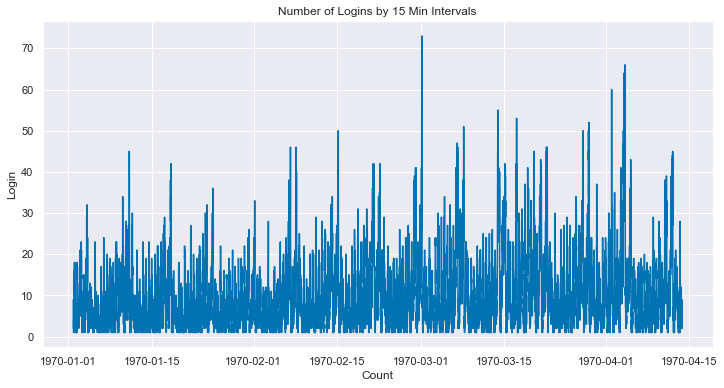

In [7]:
#plot time series by login intervals
sns.set(rc = {'figure.figsize':(12, 6)}, style='darkgrid', palette='colorblind')
sns.lineplot(x='login_time', y='count',data=df)
plt.xlabel('Count')
plt.ylabel('Login')
plt.title('Number of Logins by 15 Min Intervals')
plt.show()

* Signs of periodicity but hard to tell amidst noise
* Potential outliers
* Potential daily pattern indicated by large spike in each day interval
* Potential weekly pattern indicated by trend upward in seven day intervals 

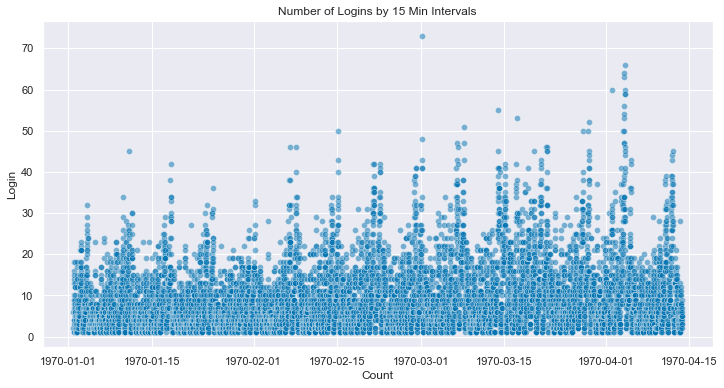

In [8]:
#replot time series to remove lines
sns.scatterplot(x='login_time', y='count',data=df, alpha=0.5)
plt.xlabel('Count')
plt.ylabel('Login')
plt.title('Number of Logins by 15 Min Intervals')
plt.show()

* Some unusually high points, notably on 1970-03-01
* May investigate underlying data further

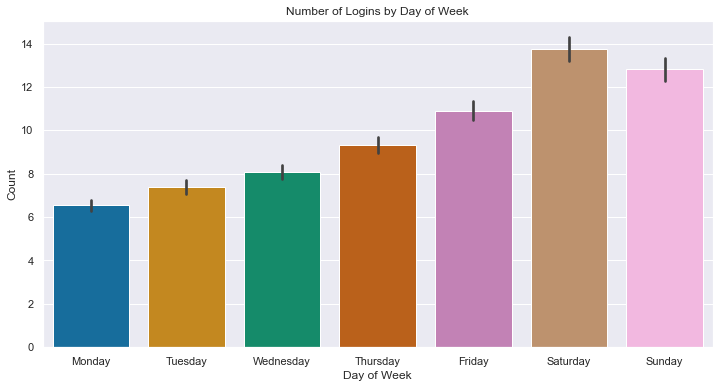

In [9]:
#plot login counts by day of week
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.barplot(x=df.login_time.dt.day_name(), y='count', data=df, order=order)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Logins by Day of Week')
plt.show()

* Increase in demand as the week progress
* Peaks on Saturday but remains high through Sunday
* Sharp drop on Monday

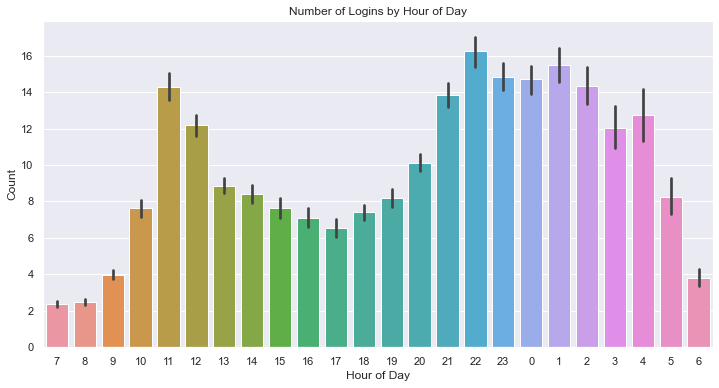

In [10]:
#plot login counts by hour of day
order = list(range(7, 24)) + list(range(0,7))
sns.barplot(x=df.login_time.dt.hour, y='count', data=df, order=order)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Number of Logins by Hour of Day')
plt.show()

* Morning hours (6-9am) have lowest demand
* First peak at 11am but shortlived, downdward trend through the afternoon
* Upward trend begins in the evening at 6pm and peaks at 10pm
* Demand remains high until morning 

## Part 2: Experiment and metrics design

1)  What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

* Total rides by driver: The key measure of success depends largely on the company’s pricing model; if the model is profit per ride, then the company should view toll reimbursement as a way to incentivize drivers to take more rides overall. However, this is not a good option for capturing actual city-to-city travel given that a driver taking riders from one city to another may have less time for more (shorter) rides within a single city. If that is the case, then the company should reconsider whether exclusivity to each city is a problem in the first place; reimbursing tolls may not increase total rides overall, the primary profit driver. 

* Total miles by driver: If, however, the pricing model is profit per mile, then the company should view toll reimbursement as incentivizing both 1) more rides and/or 2) longer rides. Drivers could either be crossing the toll bridge to access the city with the most activity at any given time and/or drivers may be taking riders from city to city, which requires crossing the toll bridge. By maximizing the total miles per driver, the company has an easy way to calculate (post-experiment) whether the revenue gain from any additional miles outweigh the costs of reimbursing toll fees. 

* Total bridge crossings: If the impact on profit does not matter (perhaps the company is simply trying to improve community relations by increasing visibility/availability of its drivers), then one measure could be the total number of toll bridge crossings. This would be the most direct way of tracking city-to-city travel. However, it makes less sense for the company to reimburse these costs unless there are external gains unrelated to revenue. 

* The following experiment will use ‘total miles by driver’ as the key measure of success.  


2)  Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment 
b)  what statistical test(s) you will conduct to verify the significance of the observation
c)  how you would interpret the results and provide recommendations to the city operations team along with any caveats. 

* Perform exploratory data analysis to get a sense of 1) population size, 2) whether the ‘total miles per driver’ metric is normally distributed, and 3) if the population mean can be used for statistical analysis. 
* If there are problems with any of the above, then explore possible A/B testing options (this option is likely more costly for the company to implement and reduces the sample size). 
* This experiment will assume the population mean can be used given that Gotham and Metropolis are described to have fallen into “circadian rhythms.” 
* Experiment: Inform all drivers that toll fees will be reimbursed for one month
* Track the total miles by driver for each week
* Use a one-sample Z test to find the p-value for the experiment sample 
* If significant, continue further testing 
* Caveats: Recommendations beyond further testing would likely be fairly limited. An increase in total miles by driver could be caused by a number of confounding reasons, including an early ‘novelty’ effect increase by drivers who eventually fall back into old rhythms. To counteract this, continued testing on the population (increasing the reimbursement for a second month and using those results for significance testing) would be the immediate recommendation. 
* If insignificant, consider ending the program or choosing one of the alternative metrics for continued testing


## Part 3: Predictive Modeling

In [11]:
#load data
data = pd.read_json('ultimate_data_challenge.json')

In [12]:
#check load
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
#check duplicates
data.duplicated().sum()

8

In [15]:
#drop duplicates
df = pd.DataFrame(data.drop_duplicates())

In [16]:
#check percent of null
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

avg_rating_of_driver      16.240598
phone                      0.792127
avg_rating_by_driver       0.402064
city                       0.000000
trips_in_first_30_days     0.000000
signup_date                0.000000
avg_surge                  0.000000
last_trip_date             0.000000
surge_pct                  0.000000
ultimate_black_user        0.000000
weekday_pct                0.000000
avg_dist                   0.000000
dtype: float64

* 16% missing values for avg rating of driver
* Minimal missing values for phone and avg rating by driver

<AxesSubplot:xlabel='avg_rating_of_driver', ylabel='Count'>

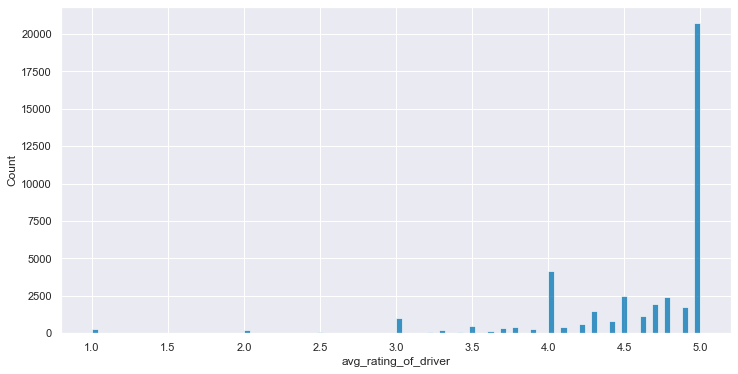

In [17]:
#check avg rating of driver
sns.histplot(df.avg_rating_of_driver)

* ratings range from 1 to 5
* vast majority of ratings at the upper range
* since giving no rating perhaps reflects back on the user, impute 0 for null values

In [18]:
#fill null values with 0
df.avg_rating_of_driver.fillna(0, inplace=True)

In [19]:
#check phone
df.phone.value_counts()

iPhone     34578
Android    15018
Name: phone, dtype: int64

* Because the variable is categorical and the missing values are less than 1%, drop NA

In [20]:
#drop missing phone values
df = df.dropna(subset=['phone'])

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='Count'>

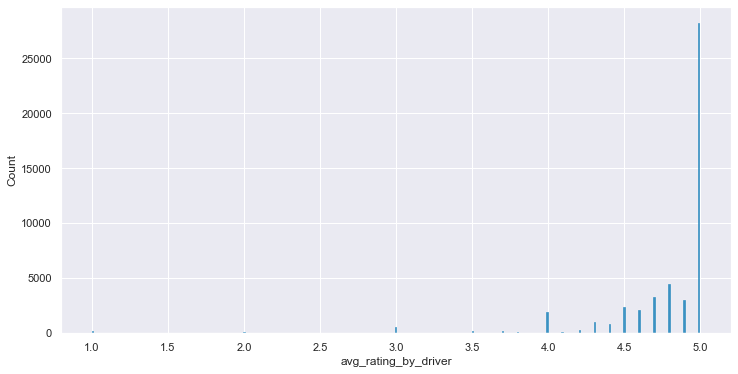

In [21]:
#check avg_rating_by_driver
sns.histplot(df.avg_rating_by_driver)

* similar to avg_rating_of_driver
* missing value from the driver is not necessarily informative
* since missing values are again less than 1%, drop NA

In [22]:
#drop missing avg_rating_by_driver values
df = df.dropna(subset=['avg_rating_by_driver'])

In [23]:
#check most recent last_trip_date
df.last_trip_date.sort_values(ascending=False).head()

37559    2014-07-01
31120    2014-07-01
21945    2014-07-01
23320    2014-07-01
35145    2014-07-01
Name: last_trip_date, dtype: object

In [24]:
#create target variable
df['retained'] = (df.last_trip_date >= '2014-06-01')

#drop last trip date
df.drop('last_trip_date', axis=1, inplace=True)

* Most recent last trip date was 2014-07-01
* 'Retained' defined as last trip date >= 2014-06-01

In [25]:
# retention %
print('retention rate: ', round(sum(df.retained)/len(df)*100, 2), '%')

retention rate:  37.72 %


In [26]:
data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [27]:
# check other numeric variables
numeric = ['trips_in_first_30_days','avg_surge','surge_pct','weekday_pct','avg_dist' ]

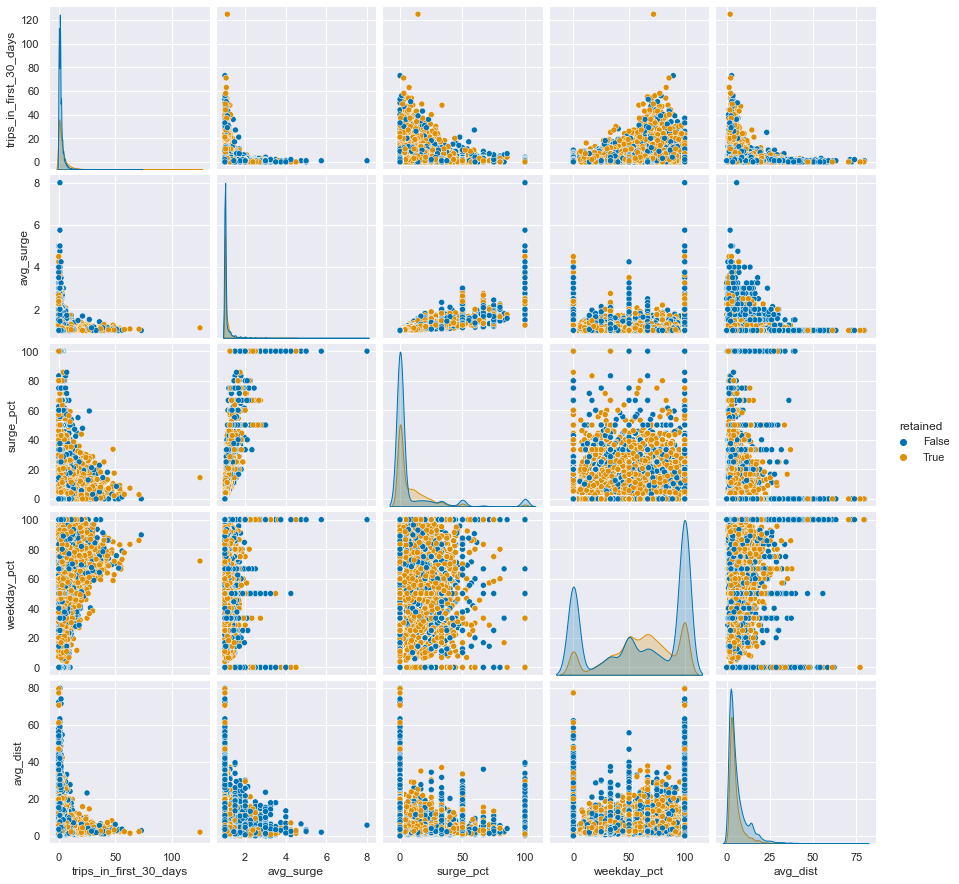

In [28]:
# check pairplots
sns.pairplot(data=df, vars=numeric, hue='retained')
plt.show()

* Will require scaling

In [29]:
# check remaining non-numeric variables
other = ['city', 'signup_date', 'ultimate_black_user']

In [30]:
# get descriptions 
df[other].describe()

,city,signup_date,ultimate_black_user
count,49398,49398,49398
unique,3,31,2
top,Winterfell,2014-01-18,False
freq,23019,2911,30822


In [31]:
# preprocessing/modeling imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# define target variable
y = df.retained
X = df.drop('retained', axis=1)

In [33]:
# one hot encode categorical variables
X = pd.get_dummies(X)

In [34]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [35]:
#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
#create and fit model
dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [37]:
#make predictions
tr_pred = dtc.predict(X_train)
te_pred = dtc.predict(X_test)

In [38]:
#check accuracy
tr_accuracy = accuracy_score(y_train, tr_pred)
te_accuracy = accuracy_score(y_test, te_pred)
print('training accuracy: ', tr_accuracy)
print('testing accuracy: ', te_accuracy)

training accuracy:  0.787205737752328
testing accuracy:  0.766059379217274


In [39]:
#check classification reports
tr_report = classification_report(y_train, tr_pred)
te_report = classification_report(y_test, te_pred)
print(tr_report)
print(te_report)

              precision    recall  f1-score   support

       False       0.81      0.87      0.84     21603
        True       0.75      0.65      0.70     12975

    accuracy                           0.79     34578
   macro avg       0.78      0.76      0.77     34578
weighted avg       0.78      0.79      0.78     34578

              precision    recall  f1-score   support

       False       0.79      0.85      0.82      9160
        True       0.72      0.63      0.67      5660

    accuracy                           0.77     14820
   macro avg       0.76      0.74      0.74     14820
weighted avg       0.76      0.77      0.76     14820



In [40]:
#top 10 important features
feature_imps = pd.DataFrame(zip(X.columns, dtc.feature_importances_), columns=['feature','importance'])
print(feature_imps.sort_values(by='importance',ascending=False).head(10))

                   feature  importance
7     avg_rating_by_driver    0.392972
9      city_King's Landing    0.180080
3                surge_pct    0.083910
5              weekday_pct    0.077638
43            phone_iPhone    0.064762
4      ultimate_black_user    0.061179
0   trips_in_first_30_days    0.033654
42           phone_Android    0.028076
8             city_Astapor    0.021943
6                 avg_dist    0.015333


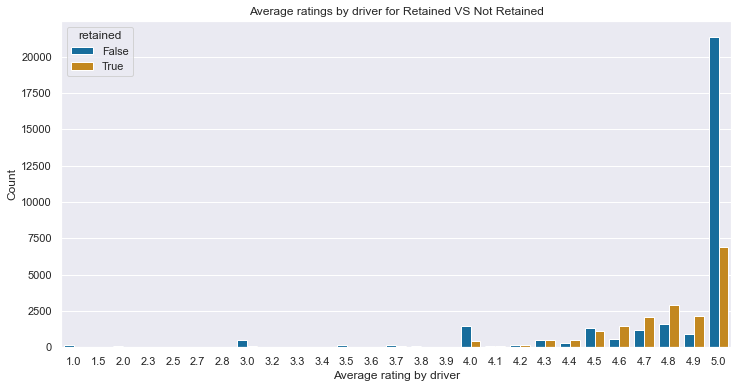

In [41]:
#recheck avg_rating_by_driver
sns.countplot(data=df, x='avg_rating_by_driver', hue='retained')
plt.xlabel('Average rating by driver')
plt.ylabel('Count')
plt.title('Average ratings by driver for Retained VS Not Retained')
plt.show()

In [42]:
#recheck city
#retained by city percentage
df[df.retained == True].city.value_counts()/sum(df.retained == True)

Winterfell        0.436759
King's Landing    0.338127
Astapor           0.225114
Name: city, dtype: float64

In [43]:
#not retained by city percentage
df[df.retained == False].city.value_counts()/(len(df)-(sum(df.retained == True)))

Winterfell        0.483698
Astapor           0.395183
King's Landing    0.121120
Name: city, dtype: float64

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
* Around 38% of users were retained
* Duplicates were dropped
* Large numbers of missing null values were imputed based on assumption about user intent; small numbers of missing null values were dropped

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
* I chose a Decision Tree Classifier because the dataset was not large and there was not many features--the tree is less of a 'black box' and makes demonstrating recommendations to the business a bit more accessible
* I tried an alternate Logistic Regression, and initial performance was comparable but there were fewer parameters to hypertune
* The model had around 76% accuracy on the test set, but the recall score for retained users was generally lower than other metrics. However, the business cost of potentially missing a few users is fairly low, so the company may not mind

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).
* The most important features were 1) avg_rating_by_driver and 2) city. Aside from perhaps a default score of '5', Ultimate may consider asking drivers for more information about the riders--the drivers seem to have a good sense of who eventually will return and give more 4.6-4.9 ratings. Perhaps the rating mechanism can be followed up with additional questions. Additionally, Ultimate may consider geo-targeting King's Landing residents, where 34% of the retained took ride VS only 12% of the not retained.